# LINK TO GITHUB: [Ran+Shany Repo](https://github.com/RyanWri/Afeka_DL_course_labs/tree/main/src/task_2)

**All our code is organized, you can find task2 in src/task_2 directory**

In [16]:
import os
import sys
import asyncio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nest_asyncio
import json
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import lag_plot
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns


In [17]:
# Allow nested use of asyncio.run()
nest_asyncio.apply()

**Next Cell is for Import readibility**

In [18]:
# Prepend the src directory to the PYTHONPATH
sys.path.insert(0, os.path.abspath(os.getcwd()))

# Verify that the path has been added
print(sys.path[0])

c:\Afeka\Afeka_DL_course_labs


# 1 Use the dataset from UCI Machine Learning Repository
**We read the data and split it into 10 different chunks for faster reading, data files located in src/task_2/data directory**
<br>*Asyncio is an asynchornous library for fast processing time*

In [19]:
from src.task_2.eda.eda import load_and_process_chunk

async def process_data_parallel():
    rootdir = os.path.join(os.getcwd(), "src", "task_2", "data")

    # Traverse Data Directory and get paths to all chunk files
    file_names = []
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            file_names.append(os.path.join(subdir, file))
    
    # Load and process each chunk
    tasks = [load_and_process_chunk(file) for file in file_names]
    results = await asyncio.gather(*tasks)

    # Concatenate all chunks into a single DataFrame
    full_df = pd.concat(results)
    return full_df

# Run the asynchronous processing
full_df = asyncio.run(process_data_parallel())

# 2. Perform Exploratory Data Analysis (EDA) of the dataset

In [20]:
# Display the first few rows of the dataset
display(full_df.head())

# Summary statistics
display(full_df.describe())

# Display information
display(full_df.info())

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.078124e+00,1.235021e-01,2.408456e+02,4.607140e+00,1.107879e+00,1.282265e+00,6.388152e+00
std,1.016800e+00,1.120353e-01,3.220734e+00,4.422378e+00,6.115669e+00,5.787271e+00,8.407490e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.960000e-01,1.020000e-01,2.410400e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,5.566000e+00,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2008-12-06 07:12:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


None

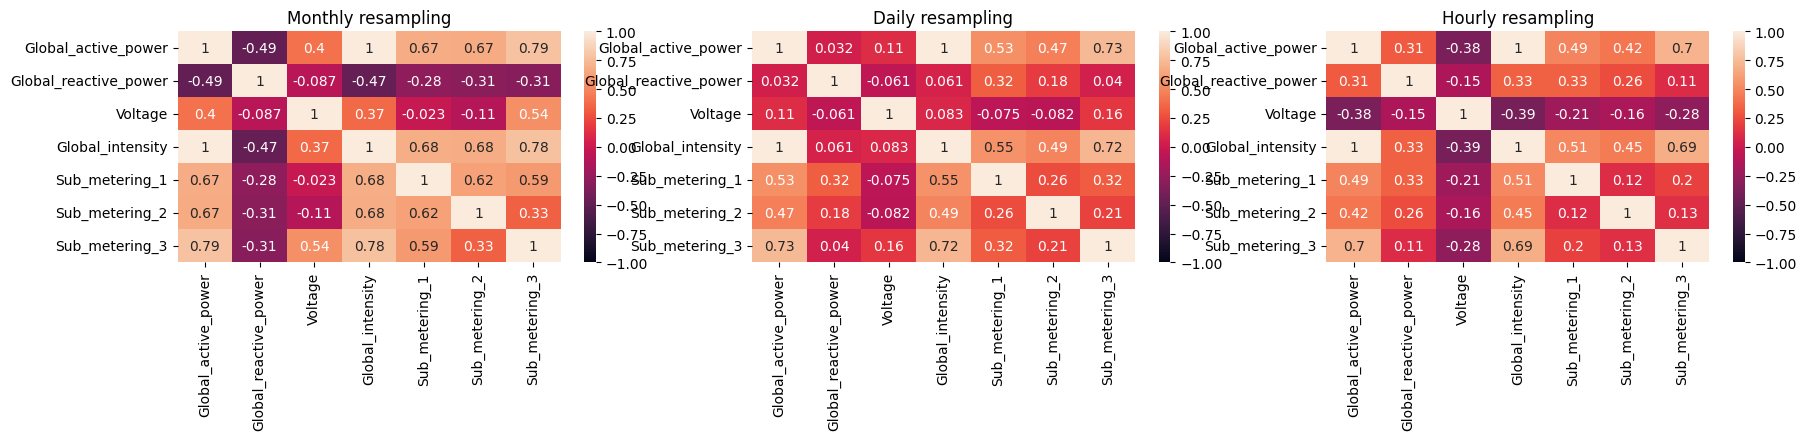

In [21]:
f= plt.figure(figsize=(21,3))

ax=f.add_subplot(131)
dfm = full_df.resample('ME').mean()
sns.heatmap(dfm.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Monthly resampling', size=12)

ax=f.add_subplot(132)
dfd = full_df.resample('D').mean()
sns.heatmap(dfd.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Daily resampling', size=12)
  
ax=f.add_subplot(133)
dfh = full_df.resample('h').mean()
sns.heatmap(dfh.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Hourly resampling', size=12)
plt.show()

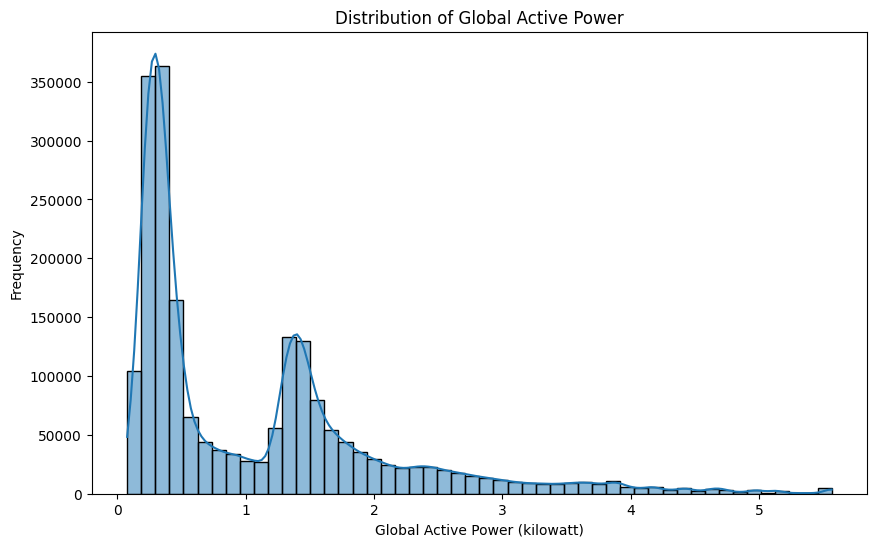

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(full_df['Global_active_power'], bins=50, kde=True)
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kilowatt)')
plt.ylabel('Frequency')
plt.show()

## 2.1 Visualize Time Series Trends

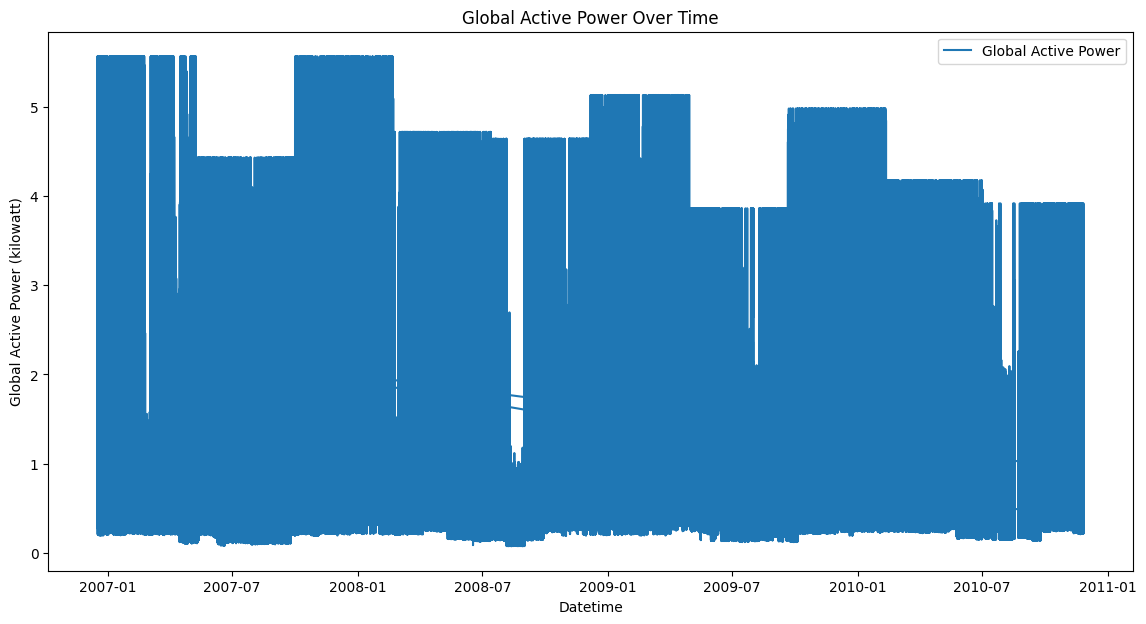

In [23]:
plt.figure(figsize=(14, 7))
plt.plot(full_df['Global_active_power'], label='Global Active Power')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power (kilowatt)')
plt.title('Global Active Power Over Time')
plt.legend()
plt.show()

## 2.2 Check for Seasonality and Cyclical Patterns

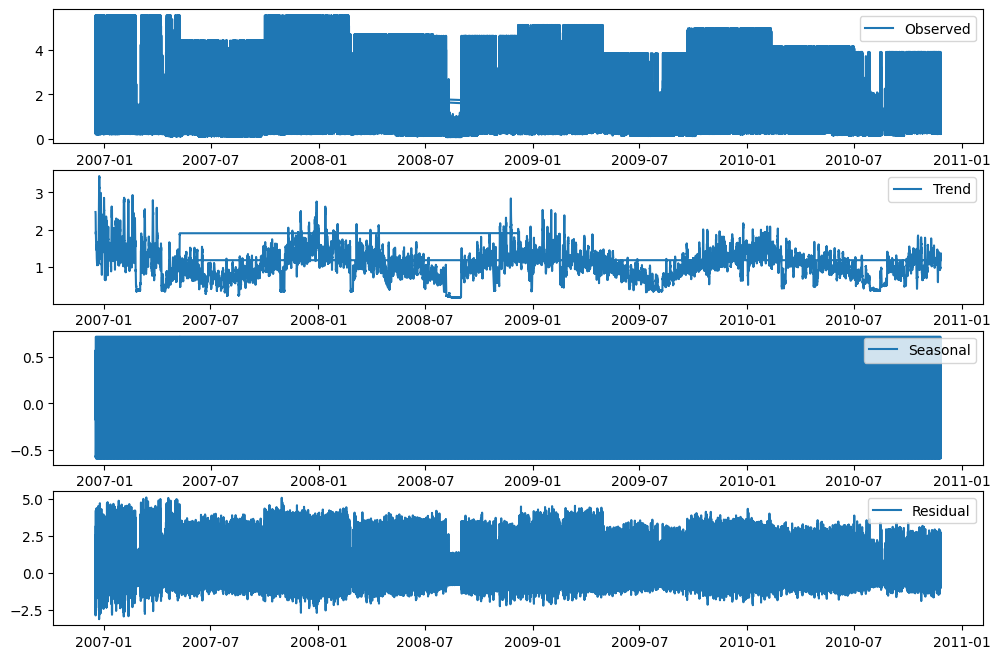

In [24]:
def check_seasonality_and_cyclical_patterns(df: pd.DataFrame):
    # Decompose the time series
    decomposition = seasonal_decompose(
        df["Global_active_power"].dropna(), model="additive", period=24 * 60
    )

    # Plot decomposition results
    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(decomposition.observed, label="Observed")
    plt.legend(loc="upper right")
    plt.subplot(412)
    plt.plot(decomposition.trend, label="Trend")
    plt.legend(loc="upper right")
    plt.subplot(413)
    plt.plot(decomposition.seasonal, label="Seasonal")
    plt.legend(loc="upper right")
    plt.subplot(414)
    plt.plot(decomposition.resid, label="Residual")
    plt.legend(loc="upper right")
    plt.show()


check_seasonality_and_cyclical_patterns(full_df)

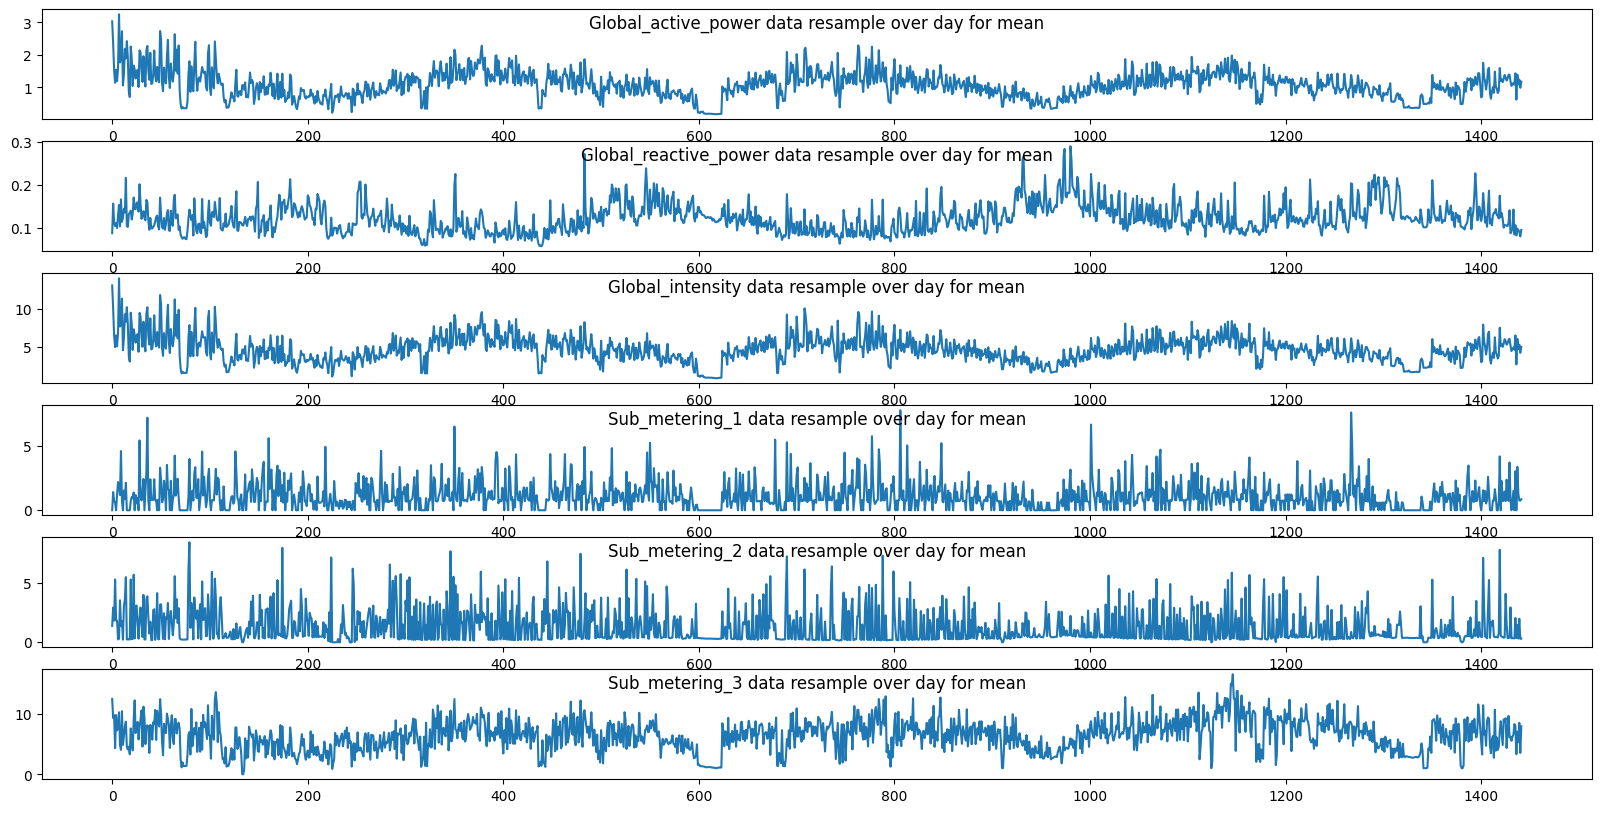

In [25]:
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(full_df.resample('D').mean().values[:, col])
    plt.title(full_df.columns[col] + ' data resample over day for mean', y=0.75, loc='center')
    i += 1
plt.show()

## 2.3 Analyze Distribution of Power Consumption

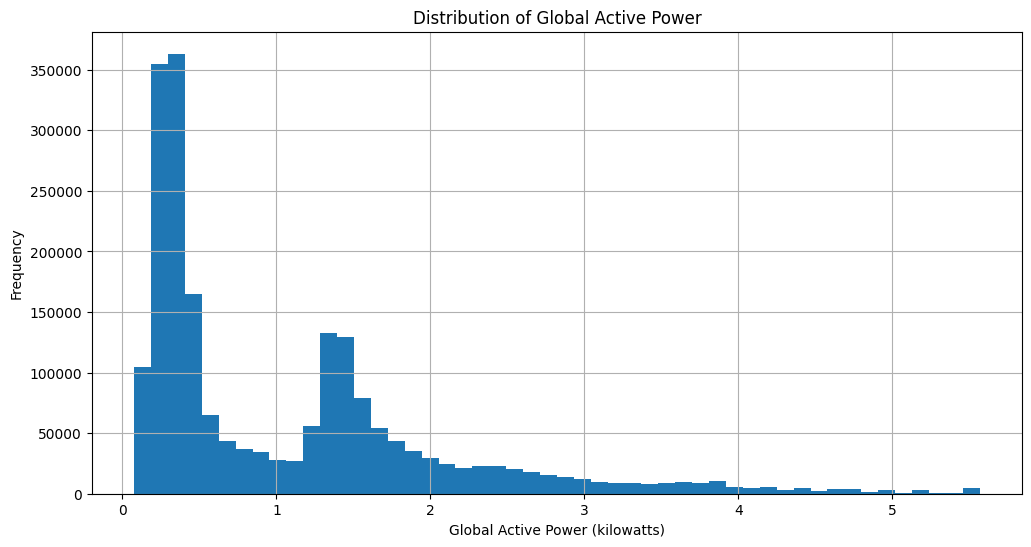

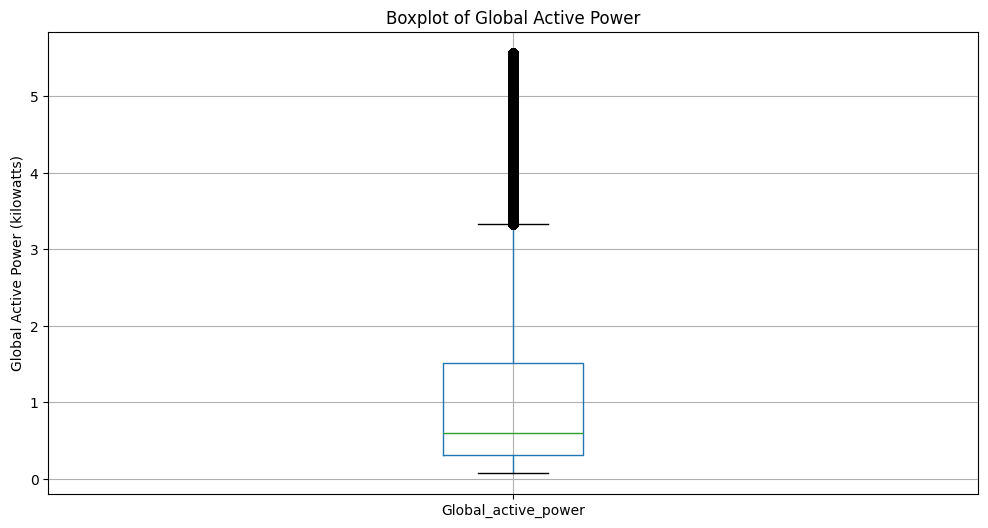

In [26]:
def analyze_distribution_of_power_consumption(df: pd.DataFrame):
    # Plot histogram
    plt.figure(figsize=(12, 6))
    df["Global_active_power"].hist(bins=50)
    plt.xlabel("Global Active Power (kilowatts)")
    plt.ylabel("Frequency")
    plt.title("Distribution of Global Active Power")
    plt.show()

    # Plot boxplot
    plt.figure(figsize=(12, 6))
    df.boxplot(column="Global_active_power")
    plt.ylabel("Global Active Power (kilowatts)")
    plt.title("Boxplot of Global Active Power")
    plt.show()

analyze_distribution_of_power_consumption(full_df)

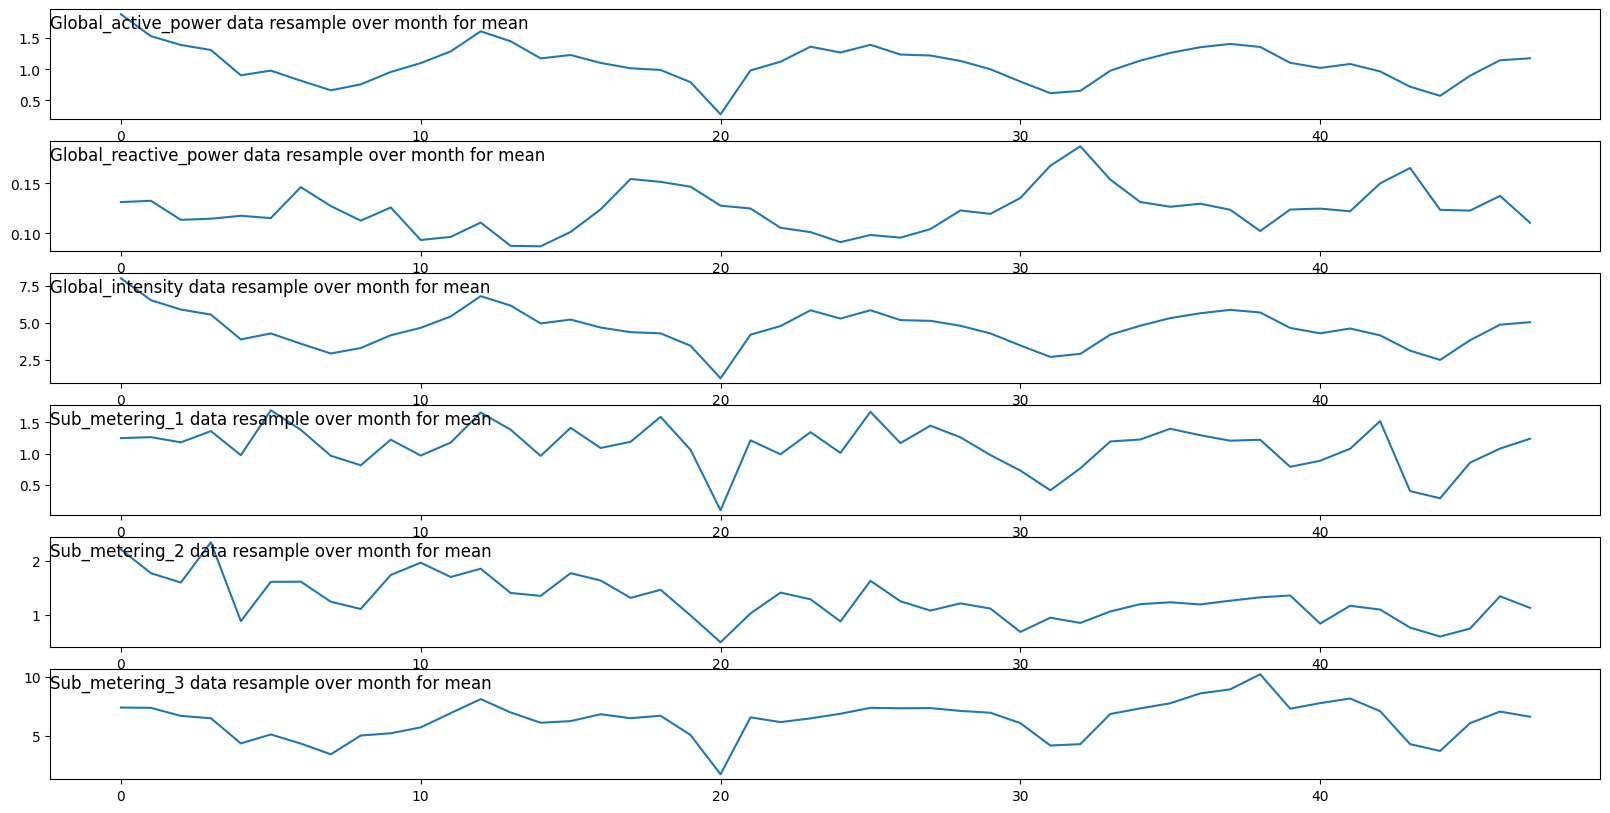

In [27]:
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(full_df.resample('ME').mean().values[:, col])
    plt.title(full_df.columns[col] + ' data resample over month for mean', y=0.75, loc='left')
    i += 1
plt.show()

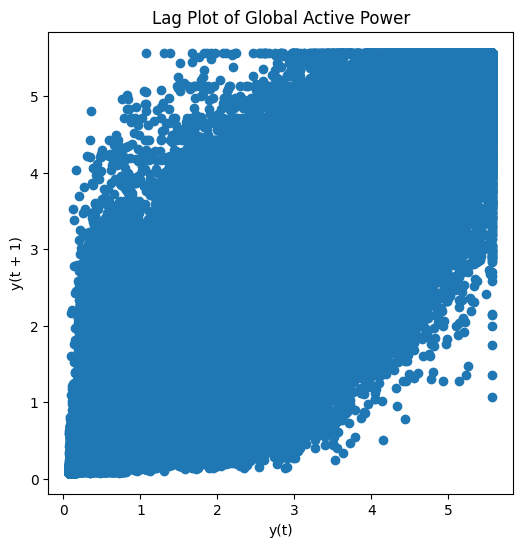

In [28]:
plt.figure(figsize=(6, 6))
lag_plot(full_df['Global_active_power'])
plt.title('Lag Plot of Global Active Power')
plt.show()

# 3. Implement a linear regression model to predict power consumption for the last three time periods

In [29]:
from src.task_2.models.linear_regression import run_linear_regression_e2e

In [30]:
lr_results = run_linear_regression_e2e(full_df)

Training set size: (1660204, 3)
Testing set size: (415052, 3)


# 4. Evaluate the linear regression model using appropriate metrics

In [31]:
print(json.dumps(lr_results, indent=1))

{
 "Mean Absolute Error (MAE)": 0.09091245342503254,
 "Mean Squared Error (MSE)": 0.061170089665457825,
 "Root Mean Squared Error (RMSE)": 0.2473258774682864,
 "R-squared (R\u00b2) value": 0.9405323432612778
}


# 5. Implement a Recurrent Neural Network (RNN) for power consumption prediction

In [ ]:
from src.task_2.preprocessing.sequence import split_data_x_and_y

In [47]:
# resample to reduce training time
df_resample = full_df.resample('h').mean() 
df_resample.shape

# create global scaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_resample)

# split into X and y
X, y = split_data_x_and_y(df_resample)


In [ ]:
from src.task_2.models.rnn_model import run_rnn_model_e2e

c:\Afeka\Afeka_DL_course_labs\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 100)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,301 (40.24 KB)

 Trainable params: 10,301 (40.24 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
432/432 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.3969
Epoch 2/20
432/432 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.3107
Epoch 3/20
432/432 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.3103
Epoch 4/20
432/432 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.3064
Epoch 5/20
432/432 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.3071
Epoch 6/20
432/432 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.2985
Epoch 7/20
432/432 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.3020
Epoch 8/20
432/432 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.2996
Epoch 9/20
432/432 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.3003


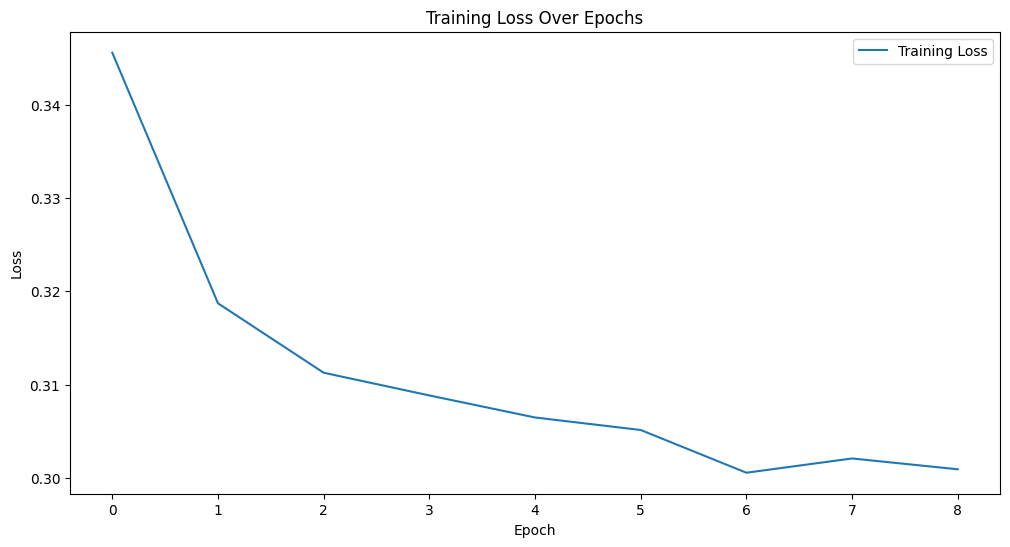

216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2821
Test loss: 0.2904496192932129
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


ValueError: too many values to unpack (expected 2)

In [33]:
rnn_results = run_rnn_model_e2e(df_resample)
print(json.dumps(rnn_results, indent=1))

# 6. Implement Long Short-Term Memory (LSTM) for power consumption prediction

In [34]:
from src.task_2.models.long_short_term_memory import run_lstm_model_e2e

Training set size: (27668, 1, 3)
Testing set size: (6918, 1, 3)
Epoch 1/20


c:\Afeka\Afeka_DL_course_labs\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


433/433 - 8s - 18ms/step - loss: 0.0495
Epoch 2/20
433/433 - 1s - 3ms/step - loss: 0.0159
Epoch 3/20
433/433 - 1s - 3ms/step - loss: 0.0150
Epoch 4/20
433/433 - 2s - 4ms/step - loss: 0.0146
Epoch 5/20
433/433 - 1s - 3ms/step - loss: 0.0144
Epoch 6/20
433/433 - 1s - 3ms/step - loss: 0.0142
Epoch 7/20
433/433 - 1s - 3ms/step - loss: 0.0141
Epoch 8/20
433/433 - 1s - 3ms/step - loss: 0.0140
Epoch 9/20
433/433 - 2s - 4ms/step - loss: 0.0139
Epoch 10/20
433/433 - 1s - 3ms/step - loss: 0.0139
Epoch 11/20
433/433 - 1s - 3ms/step - loss: 0.0138
Epoch 12/20
433/433 - 2s - 4ms/step - loss: 0.0138
Epoch 13/20
433/433 - 1s - 3ms/step - loss: 0.0138
Epoch 14/20
433/433 - 1s - 3ms/step - loss: 0.0137
Epoch 15/20
433/433 - 3s - 6ms/step - loss: 0.0138
Epoch 16/20
433/433 - 1s - 3ms/step - loss: 0.0137
Epoch 17/20
433/433 - 1s - 3ms/step - loss: 0.0137
Epoch 18/20
433/433 - 1s - 3ms/step - loss: 0.0137
Epoch 19/20
433/433 - 1s - 3ms/step - loss: 0.0137
Epoch 20/20
433/433 - 1s - 3ms/step - loss: 0.0136

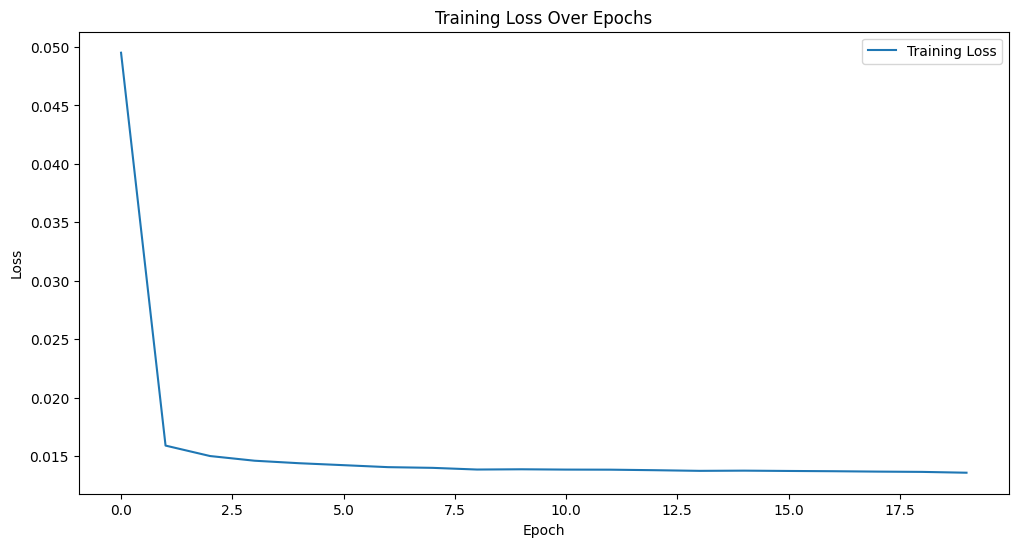

217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


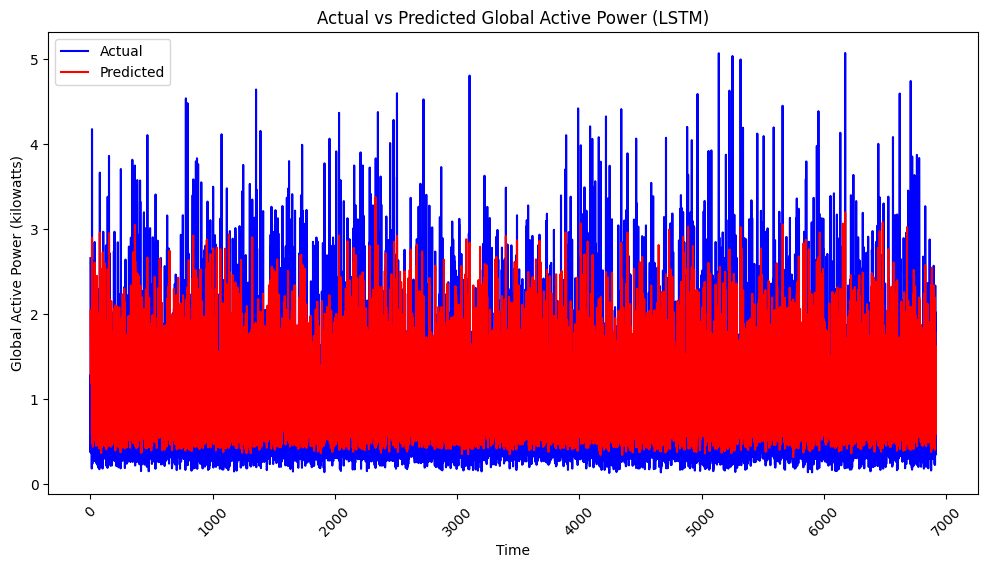

LSTM COMPLETED


In [35]:
run_lstm_model_e2e(df_resample)

# 7. Implement an LSTM model with an Attention layer for power consumption prediction

In [37]:
from src.task_2.models.lstm_with_attention import run_lstm_model_with_attention_e2e

Epoch 1/12
432/432 - 21s - 49ms/step - loss: 1.0773
Epoch 2/12
432/432 - 13s - 31ms/step - loss: 0.5650
Epoch 3/12
432/432 - 22s - 51ms/step - loss: 0.4505
Epoch 4/12
432/432 - 14s - 33ms/step - loss: 0.4103
Epoch 5/12
432/432 - 14s - 32ms/step - loss: 0.3924
Epoch 6/12
432/432 - 16s - 36ms/step - loss: 0.3841
Epoch 7/12
432/432 - 14s - 33ms/step - loss: 0.3803
Epoch 8/12
432/432 - 15s - 34ms/step - loss: 0.3686
Epoch 9/12
432/432 - 14s - 33ms/step - loss: 0.3610
Epoch 10/12
432/432 - 15s - 35ms/step - loss: 0.3556
Epoch 11/12
432/432 - 16s - 36ms/step - loss: 0.3537
Epoch 12/12
432/432 - 14s - 33ms/step - loss: 0.3491


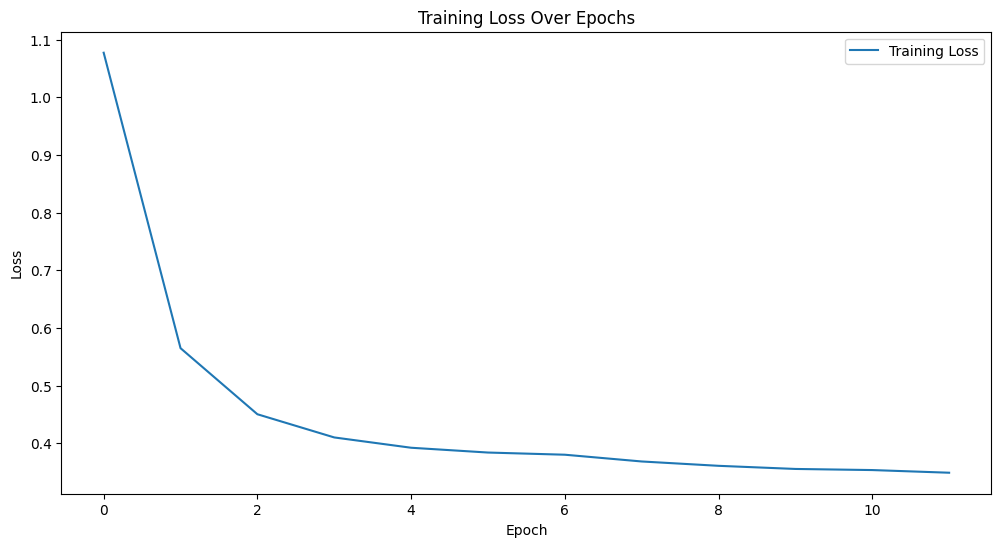

216/216 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


ValueError: non-broadcastable output operand with shape (6906,1) doesn't match the broadcast shape (6906,9)

In [38]:
run_lstm_model_with_attention_e2e(df_resample)

# 8. Data augmentation experiment

In [41]:
from src.task_2.preprocessing.sequence import create_sequences
from src.task_2.data_modification.augmentation import add_noise

In [42]:
def augment_sequence(df: pd.DataFrame, sequence_length: int):
    # Scale the data
    scaler = MinMaxScaler()

    # Drop rows with missing values
    df = df.replace("?", np.nan)
    df = df.dropna()

    # Normalize the data
    df[df.columns[1:]] = scaler.fit_transform(df[df.columns[1:]])

    # Using 'Global_active_power' as the target variable
    data = df[["Global_active_power"]].values
    X, y = create_sequences(data, sequence_length)

    # Reshape input to be [samples, time steps, features]
    X = X.reshape(X.shape[0], X.shape[1], 1)

    # Augment the data with noise
    X_augmented = add_noise(X)
    y_augmented = y  # Labels remain the same

    return X_augmented, y_augmented


In [43]:
X_augmented, y_augmented = augment_sequence(df_resample, sequence_length=60)

In [44]:
from src.task_2.models.rnn import build_rnn_model
rnn_model = build_rnn_model(60)
history = rnn_model.fit(X_augmented, y_augmented, epochs=10, batch_size=64, verbose=1, callbacks=[early_stopping])

c:\Afeka\Afeka_DL_course_labs\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 100)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,301 (40.24 KB)

 Trainable params: 10,301 (40.24 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.3857
Epoch 2/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.3113
Epoch 3/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.3124
Epoch 4/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.3114
Epoch 5/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.3065
Epoch 6/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.3033
Epoch 7/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.3110


# 9. Data reduction experiment

In [45]:
from src.task_2.data_modification.augmentation import reduce_data_randomly

In [46]:
# Apply reduction
X_reduced, y_reduced = reduce_data_randomly(X, y, reduction_factor=0.1)

NameError: name 'X' is not defined

# 10. Data resolution experiment

In [ ]:
from data_modification.resolution import resample_data_from_1min_to_2min

In [ ]:
resampled_df = resample_data_from_1min_to_2min(full_df)

# 11. Conclusion and insights